# 4. K-Means Clustering + PCA

The purpose of this notebook is to generate K-Means clusters for each data type. The clusters will be compared between the media, party platforms, and climate policy bills.

## 1. Environment Creation

### 1.1. Library Import

In [2]:
''' DATA MANAGAMENT '''
import pandas as pd
import collections
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from tempfile import TemporaryDirectory

''' DATA VISUALIZATION '''
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

''' DATA CLUSTERING '''
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.manifold import TSNE

''' MATH '''
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

''' SANITY '''
from tqdm import tqdm

C:\Users\natal\miniconda3\lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\natal\miniconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\natal\miniconda3\lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


### 1.2 Data Import

In [18]:
news_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\News Articles Lemmed- TFIDF.csv")

In [19]:
news_data

Unnamed: 0       Party           publisher  aapi  abandon  abandoned  \
0             0  Republican           The Verge   0.0      0.0        0.0   
1             1  Republican         Gizmodo.com   0.0      0.0        0.0   
2             2  Republican            BBC News   0.0      0.0        0.0   
3             3  Republican            BBC News   0.0      0.0        0.0   
4             4  Republican            BBC News   0.0      0.0        0.0   
..          ...         ...                 ...   ...      ...        ...   
815         816    Democrat                 PBS   0.0      0.0        0.0   
816         817    Democrat                 PBS   0.0      0.0        0.0   
817         818    Democrat  The Times of India   0.0      0.0        0.0   
818         819    Democrat  The Times of India   NaN      NaN        NaN   
819         699         NaN                 NaN   0.0      0.0        0.0   

     abc  ability  able  abolish  ...  yes  york  young  youth  zealot  \
0    0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
1    0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
2    0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
3    0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
4    0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
..   ...      ...   ...      ...  ...  ...   ...    ...    ...     ...   
815  0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
816  0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
817  0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   
818  NaN      NaN   NaN      NaN  ...  NaN   NaN    NaN    NaN     NaN   
819  0.0      0.0   0.0      0.0  ...  0.0   0.0    0.0    0.0     0.0   

     zeldin  zero  zers      zone  zuckerberg  
0       0.0   0.0   0.0  0.000000         0.0  
1       0.0   0.0   0.0  0.000000         0.0  
2       0.0   0.0   0.0  0.000000         0.0  
3       0.0   0.0   0.0  0.000000         0.0  
4       0.0   0.0   0.0  0.000000         0.0  
..      ...   ...   ...       ...         ...  
815     0.0   0.0   0.0  0.000000         0.0  
816     0.0   0.0   0.0  0.000000         0.0  
817     0.0   0.0   0.0  0.201006         0.0  
818     NaN   NaN   NaN       NaN         NaN  
819     0.0   0.0   0.0  0.000000         0.0  

[820 rows x 2361 columns]

In [20]:
labels_news_party = news_data['Party'].to_list()
labels_news_publisher = news_data['publisher'].to_list()

In [21]:
news_data.drop(columns=['Unnamed: 0','Party','publisher'],inplace=True)

In [22]:
news_data.fillna(0,inplace=True)

In [23]:
news_data.head()

aapi  abandon  abandoned  abc  ability  able  abolish  abortion  \
0   0.0      0.0        0.0  0.0      0.0   0.0      0.0       0.0   
1   0.0      0.0        0.0  0.0      0.0   0.0      0.0       0.0   
2   0.0      0.0        0.0  0.0      0.0   0.0      0.0       0.0   
3   0.0      0.0        0.0  0.0      0.0   0.0      0.0       0.0   
4   0.0      0.0        0.0  0.0      0.0   0.0      0.0       0.0   

   absolutely  abuse  ...  yes  york  young  youth  zealot  zeldin  zero  \
0         0.0    0.0  ...  0.0   0.0    0.0    0.0     0.0     0.0   0.0   
1         0.0    0.0  ...  0.0   0.0    0.0    0.0     0.0     0.0   0.0   
2         0.0    0.0  ...  0.0   0.0    0.0    0.0     0.0     0.0   0.0   
3         0.0    0.0  ...  0.0   0.0    0.0    0.0     0.0     0.0   0.0   
4         0.0    0.0  ...  0.0   0.0    0.0    0.0     0.0     0.0   0.0   

   zers  zone  zuckerberg  
0   0.0   0.0         0.0  
1   0.0   0.0         0.0  
2   0.0   0.0         0.0  
3   0.0   0.0         0.0  
4   0.0   0.0         0.0  

[5 rows x 2358 columns]

#### Climate Bill Data

In [24]:
bills_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\Bills Lemmed- TFIDF.csv")

In [25]:
labels_bills_billtype = bills_data['Bill Type']
labels_bills_sponser_affiliation = bills_data['Sponser Affiliation']
labels_bills_sponser_state = bills_data['Sponser State']
labels_bills_committees = bills_data['Committees']

In [26]:
bills_data.drop(columns=['Unnamed: 0','Bill Type','Sponser Affiliation','Sponser State','Committees'],inplace=True)

In [27]:
bills_data.fillna(0,inplace=True)

In [28]:
bills_data.head()

aa  abandon  abandoned  abandonment  abate  abatement  ability  abiotic  \
0  0.0      0.0        0.0          0.0    0.0        0.0      0.0      0.0   
1  0.0      0.0        0.0          0.0    0.0        0.0      0.0      0.0   
2  0.0      0.0        0.0          0.0    0.0        0.0      0.0      0.0   
3  0.0      0.0        0.0          0.0    0.0        0.0      0.0      0.0   
4  0.0      0.0        0.0          0.0    0.0        0.0      0.0      0.0   

   able  aboard  ...  zika  zinc  zinke  zip  zoe  zone  zonethe  zoning  \
0   0.0     0.0  ...   0.0   0.0    0.0  0.0  0.0   0.0      0.0     0.0   
1   0.0     0.0  ...   0.0   0.0    0.0  0.0  0.0   0.0      0.0     0.0   
2   0.0     0.0  ...   0.0   0.0    0.0  0.0  0.0   0.0      0.0     0.0   
3   0.0     0.0  ...   0.0   0.0    0.0  0.0  0.0   0.0      0.0     0.0   
4   0.0     0.0  ...   0.0   0.0    0.0  0.0  0.0   0.0      0.0     0.0   

   zoological  zquez  
0         0.0    0.0  
1         0.0    0.0  
2         0.0    0.0  
3         0.0    0.0  
4         0.0    0.0  

[5 rows x 10000 columns]

#### Party Platform Data

In [38]:
party_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\Party Platform Lemmed- TFIDF.csv")

In [39]:
labels_party_party = party_data['Party']

In [40]:
party_data.drop(columns=["Unnamed: 0","Party"],inplace=True)

In [41]:
party_data.fillna(0,inplace=True)

In [42]:
party_data.head()

ability      able  abortion    access  accessible  according  \
0  0.005157  0.005157  0.005157  0.020627    0.005157   0.005157   
1  0.006634  0.012320  0.012320  0.068233    0.014215   0.000948   

   accountability  accountable  achieved       act  ...       won      word  \
0        0.005157     0.020627  0.005157  0.020627  ...  0.005157  0.005157   
1        0.005686     0.013268  0.000948  0.083396  ...  0.009477  0.000948   

       work    worker   working     world   worship     worst      year  \
0  0.020627  0.077351  0.010314  0.077351  0.010314  0.005157  0.036097   
1  0.095716  0.074867  0.076762  0.065390  0.003791  0.003791  0.141205   

      young  
0  0.036097  
1  0.009477  

[2 rows x 892 columns]

#### BarPlot Creation

I have developed this style of barplot, and feel it is rather informative and something I enjoy aesthetically. The below function is an instantiation of it, and then saves it to your device.

The data formatter is also used to squish data into X and Y format, and easily control the output. If newline characters are needed to display in the axes properly, the changes may be made here.

In [52]:
def data_formatter(x_data,
                   y_data, 
                   x_colname,
                   y_colname
                  ):
    formatted_data = pd.DataFrame()
    formatted_data[x_colname] = x_data
    formatted_data[y_colname] = y_data
    
    return (formatted_data)

def barplot_maker(
    data,
    figsize_x: int = 10,
    figsize_y: int = 5,
    x_axis_value: str='',
    y_axis_value: str='',
    plot_title: str = '',
    x_axis_title: str = '',
    y_axis_title: str = '',
    fig_filename: str = 'NEW Saved Figure',
    dpi: int = 1000
):

    ''' STYLING THE PLOT'''
    sb.set_style("white")
    sb.set(font='Times New Roman', font_scale=1.2)
    fig, ax = plt.subplots(figsize=(figsize_x,5 )) 


    ''' PLOTTING THE DATA'''
    hist = sb.barplot(data, x=x_axis_value, y=y_axis_value, color="black")


    for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
        # Get heights and centers for each group
        heights = [bar.get_height() for bar in bar_group]
        centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]

        # Add markers
        plt.scatter(centers, heights, color='black', zorder=3)

        for center, height in zip(centers, heights):
            plt.text(
                center, 
                height, 
                f'{int(height):,}',  # Format with commas
                color='black', 
                ha='center', 
                va='bottom', 
                fontsize=10
            )

    for container in hist.containers:
        hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

    ''' SETTING ACCESS INFORMATION '''
    hist.set_title(plot_title)
    hist.set_xlabel(x_axis_title)
    hist.set_ylabel(y_axis_title)
    ax.tick_params(axis='x')
    ax.grid(True)
    ax.set_facecolor("white")

    formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
    ax.yaxis.set_major_formatter(formatter)


    # Set the border (box) around the entire plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Set the color of the border to black
        spine.set_linewidth(1)  # Set the width of the border

    ''' DISPLAYING THE DATA '''
    filename = fig_filename+".png"
    plt.tight_layout()
    plt.savefig(filename,dpi=1000)
    plt.show();

## 2. K-Means Clustering

### 2.1 Instantiating the KMeans Clustering

code source: [SciKit Learn Clustering](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

In [14]:
""" CREATING A FUNCTION FOR X MEANS INSTANTIATION """
## Intalizing storage containers
d = collections.defaultdict(list)

## Defining the function which will both fit and evaluate at the same time.
## The parameters for this function are a kmeans object,
##  X labels, a name for the evaluation, and amount of training iterations
def fit_and_evaluate(data,random_state,num_clusters,num_iterations,dataset_name):
    print (f"------------------------------------------------------------------\nK-MEANS CLUSTERING FOR: {dataset_name}")
    ## Creating a storage container for  scores
    scores = d
    km = KMeans()
    km.set_params(random_state=random_state)
    km.set_params(n_clusters = num_clusters)
    km.set_params(n_init = num_iterations)
    km.fit(data)
    ## Assessing the model for each iteration on performance metrics.
    scores['Silhouette Coefficient'].append(metrics.silhouette_score(data, km.labels_,sample_size = len(data)))
    print(f"Model Paramaters:\n\tk = {num_clusters}\n\tn_init = {num_iterations} \n\nSihloutte Score: {silhouette_score(data,km.labels_)}")
    
    
      ## Assinging the outputted array to the cluster ids and the cluster sizes.
    cluster_ids, cluster_sizes = np.unique(km.labels_, return_counts=True)

  ## Printing out the number of elements and the actual class labels for each of the four news categories.
    print(f"\nNumber of elements assigned to each cluster: {cluster_sizes}")
    print (f"\nThe Cluster IDs are:{cluster_ids}")
    return (km)

In [15]:
''' CREATING A FUNCTION TO RETURN THE LABELS FOR K-MEANS '''
def cluster_reader(kmeans_model,data,term_list,num_clusters,k_words,dataset_name):
    print (f"------------------------------------------------------------------\nTOP WORDS PER CLUSTER FOR: {dataset_name}")
    ## Extracting the cluster centers
    original_clusters = kmeans_model.cluster_centers_
    
    ## Ordering the clusters
    order_centroids= original_clusters.argsort()[:,::-1]
    terms = term_list
    
    cluster_topn = []
    for cluster in range(0,num_clusters):
        temp_wordlist = []
        print (f"Cluster {cluster}: ",end="")
        for term in order_centroids[cluster, :k_words]:
            print(f"{terms[term]} ", end="")
            temp_wordlist.append(term)
            
        cluster_topn.append(temp_wordlist)
            
            
        print ("\n")
        
    return (cluster_topn)

In [19]:
def shadow_reporter(data,random_state,num_clusters,num_iterations):
    km = KMeans()
    km.set_params(random_state=random_state)
    km.set_params(n_clusters = num_clusters)
    km.set_params(n_init = num_iterations)
    km.fit(data)
    ## Assessing the model for each iteration on performance metrics.
    shadow = metrics.silhouette_score(data, km.labels_,sample_size = len(data))
    return (shadow)


def shadow_tester(data_name,data,random_state,num_iterations, step_size,cluster_start,cluster_end):
    shadow_scores = []
    
    for clust in tqdm(range(cluster_start,cluster_end,step_size),desc='🧺🐜... clustering',leave=True):
        clust_score = shadow_reporter(data,random_state,clust,num_iterations)
        shadow_scores.append({'Clusters':clust,"Silhouette":clust_score})
    title = f"Silhouette Clustering Testing:\n{data_name}\n\tIterations: {num_iterations}\n\tCluster Range: {cluster_start} - {cluster_end}\n\tStep Size: {step_size}"
    df = pd.DataFrame(shadow_scores)
    plot = sb.lineplot(data=df,x='Clusters',y='Silhouette')
    
    print (title)
    print ("-------------------------------------------------------------------------------")
    plt.show()
    print ("-------------------------------------------------------------------------------")
    print (df)
    return (shadow_scores)

In [58]:
def cluster_vis(title, kmeans_model, data, term_list, k_words=5,legend_columns=2):
    
    ## Ordering the clusters
    original_clusters = kmeans_model.cluster_centers_
    order_centroids= original_clusters.argsort()[:,::-1]
    terms = term_list
    
    plt.rcParams['font.family'] = 'Times New Roman'
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    tsne = TSNE(n_components=2, random_state=811)
    reduced_data = tsne.fit_transform(data.to_numpy())
    
    colors = ["#884f45", "#306036", "#63a990", "#c70c77", "#0a65a9", "#eb5f6a", "#83f253",
              "#19c977", "#fbcd32", "#2c7e0d", "#c57350", "#c6f19f", "#3a8f3b", "#873789",
              "#179c5d", "#1fcc36", "#bc63e9", "#68a521", "#481d20", "#10f8ec", "#ecf354",
              "#d051a0", "#8f82bc", "#4a58b2", "#ad265c", "#9a4f2b", "#a76f9b", "#e1de3e",
              "#04ed1c", "#3d2e2a", "#12bdf4", "#21c7a7", "#fec7ca", "#a8cdcc", "#076788",
              "#63bd08", "#3a7e0e", "#e92892", "#50cafd", "#79acd4", "#78b53e", "#fd8c77",
              "#9ef2ce", "#f878e2", "#ee41c9", "#71aef3", "#27d569", "#fb5484", "#6f68b9",
              "#36e35e"]
    
    # Step 1: Create cluster_topn lists
    cluster_topn = []
    num_clusters = kmeans_model.n_clusters  # Get number of clusters from the model
    
    for cluster in range(num_clusters):
        temp_wordlist = []
        for term_idx in order_centroids[cluster, :k_words]:
            temp_wordlist.append(terms[term_idx])
        
        cluster_topn.append(temp_wordlist)
    
    numpy_labels = np.unique(kmeans_model.labels_)
    
    # Step 2: Plot points with cluster word labels
    for i in numpy_labels:
        points = reduced_data[kmeans_model.labels_ == i]
        
        if points.shape[0] > 0:
            # Combine top words into a string for labeling
            label_words = ', '.join(cluster_topn[i])
            label = f'Cluster {i}: {label_words}'
            
            ax.scatter(points[:, 0], points[:, 1],
                       c=colors[i % len(colors)], label=label)
    
    # Optional: Plot cluster centers (commented out in your version)
    # cluster_centers = kmeans_model.cluster_centers_
    
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Clusters", fontsize='small',ncol=legend_columns)
    ax.axis('off')
    ax.set_title(title)
    
    plt.show()


### 2.2 Clustering The Data

In this section, a series of tests for clustering will be preformed. The goal of this is to fit the best model to the data.

#### 2.2.1 News Data

In [17]:
terms = news_data.columns.tolist()

🧺🐜... clustering: 100%|██████████████████████████████████████████████████████████████| 10/10 [08:06<00:00, 48.70s/it]


Silhouette Clustering Testing:
News Data TFIDF Lemmatized
	Iterations: 250
	Cluster Range: 2 - 50
	Step Size: 5
-------------------------------------------------------------------------------


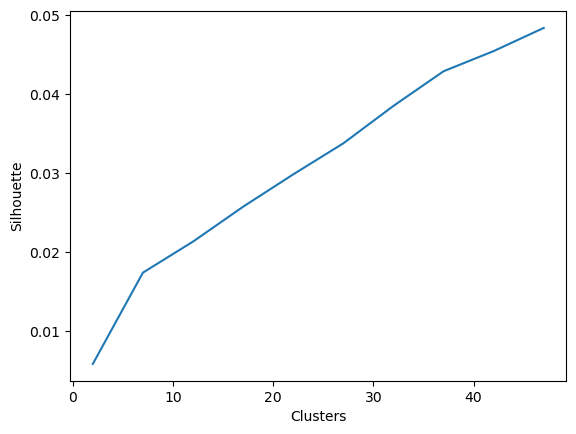

-------------------------------------------------------------------------------
   Clusters  Silhouette
0         2    0.005891
1         7    0.017443
2        12    0.021374
3        17    0.025787
4        22    0.029879
5        27    0.033806
6        32    0.038543
7        37    0.042925
8        42    0.045479
9        47    0.048411


In [20]:
news_shadow_scores = shadow_tester("News Data TFIDF Lemmatized",news_data,random_state=811,num_iterations =250,
                                   step_size=5,cluster_start=2,cluster_end=50)

🧺🐜... clustering: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.13s/it]


Silhouette Clustering Testing:
News Data TFIDF Lemmatized
	Iterations: 50
	Cluster Range: 2 - 10
	Step Size: 2
-------------------------------------------------------------------------------


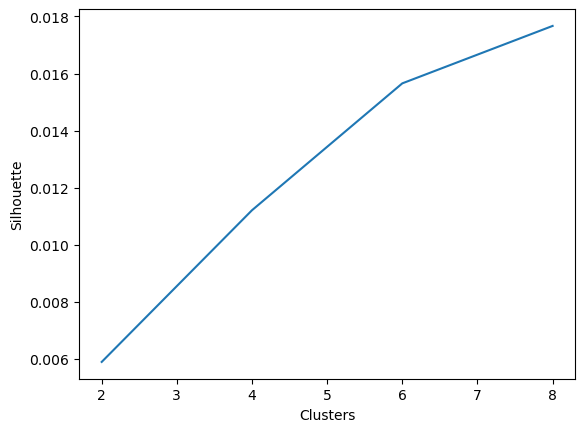

-------------------------------------------------------------------------------
   Clusters  Silhouette
0         2    0.005900
1         4    0.011212
2         6    0.015656
3         8    0.017667


In [23]:
news_shadow_scores = shadow_tester("News Data TFIDF Lemmatized",news_data,random_state=811,num_iterations =50,
                                   step_size=2,cluster_start=2,cluster_end=10)

In [24]:
news_kmean = fit_and_evaluate(news_data,random_state=811,num_clusters=4,num_iterations=1000,dataset_name = 'News Articles Lemmed- Count Vectorizer - Unlabeled')
cluster_topn = cluster_reader(news_kmean,news_data,terms,num_clusters=4,k_words=5,dataset_name = 'News Articles Lemmed- Count Vectorizer - Unlabeled')

------------------------------------------------------------------
K-MEANS CLUSTERING FOR: News Articles Lemmed- Count Vectorizer - Unlabeled
Model Paramaters:
	k = 4
	n_init = 1000 

Sihloutte Score: 0.01141705566887909

Number of elements assigned to each cluster: [374 236 122  88]

The Cluster IDs are:[0 1 2 3]
------------------------------------------------------------------
TOP WORDS PER CLUSTER FOR: News Articles Lemmed- Count Vectorizer - Unlabeled
Cluster 0: new trump climate year carter 

Cluster 1: trump donald president day order 

Cluster 2: wildfire california los angeles newsom 

Cluster 3: biden joe farewell trump president 



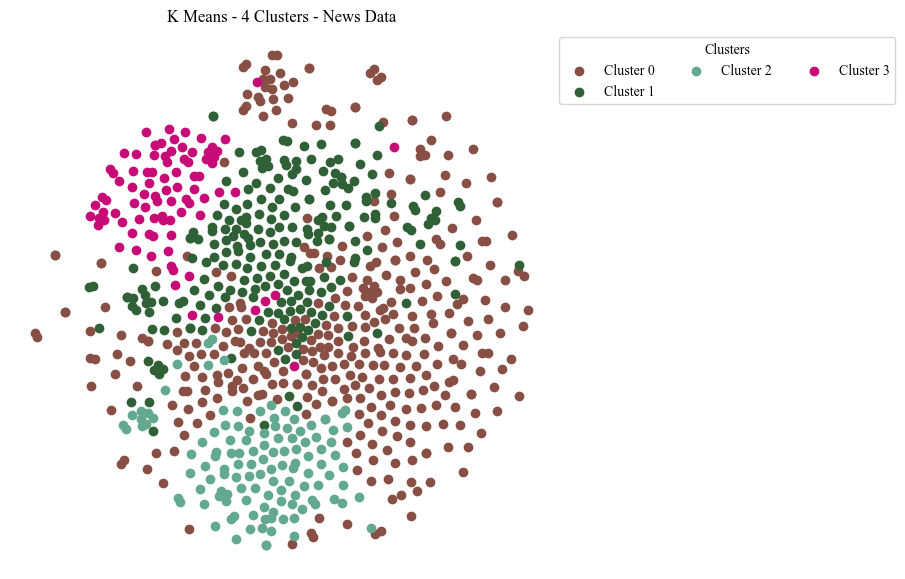

In [27]:
cluster_vis("K Means - 4 Clusters - News Data",news_kmean,news_data)

In [63]:
news_kmean = fit_and_evaluate(news_data,random_state=811,num_clusters=20,num_iterations=1000,dataset_name = 'News Articles Lemmed- TF-IDF - Unlabeled')
cluster_topn = cluster_reader(news_kmean,news_data,terms,num_clusters=20,k_words=5,dataset_name = 'News Articles Lemmed- TF-IDF - Unlabeled')

------------------------------------------------------------------
K-MEANS CLUSTERING FOR: News Articles Lemmed- TF-IDF - Unlabeled
Model Paramaters:
	k = 20
	n_init = 1000 

Sihloutte Score: 0.02749112423252739

Number of elements assigned to each cluster: [ 19  38  10  35  27  66 136  24   9 157  48  21  13  20  18  34  17  23
  49  56]

The Cluster IDs are:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
------------------------------------------------------------------
TOP WORDS PER CLUSTER FOR: News Articles Lemmed- TF-IDF - Unlabeled
Cluster 0: energy renewable buy best trump 

Cluster 1: federal state government plan trump 

Cluster 2: stronger speech stage america biden 

Cluster 3: executive order trump day donald 

Cluster 4: biden farewell offshore address drilling 

Cluster 5: wildfire los angeles california home 

Cluster 6: trump donald day president ha 

Cluster 7: hearing trump confirmation live senate 

Cluster 8: diversity program dei organization meta 



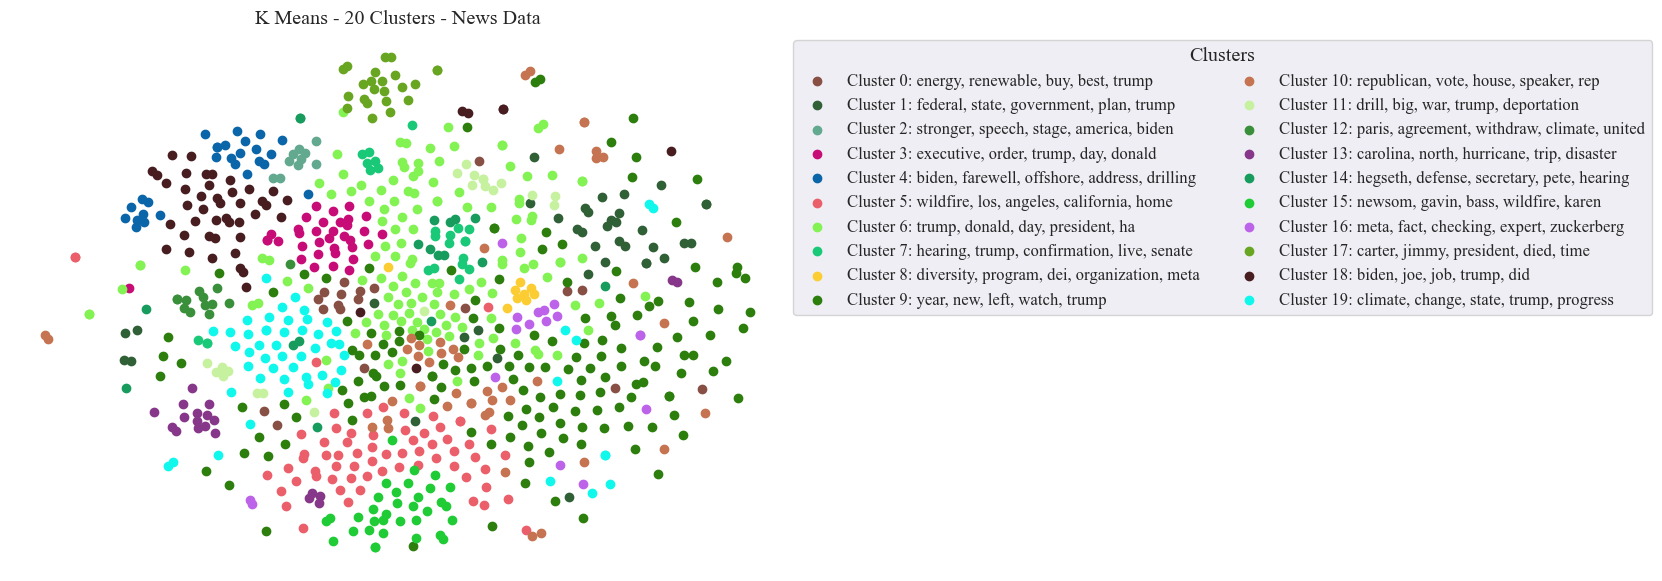

In [76]:
cluster_vis("K Means - 20 Clusters - News Data",news_kmean,news_data,terms,legend_columns=2)

In [72]:
cluster_news_data = data_formatter(x_data=[ 19,  38,  10,  35,  27,  66, 136,  24,   9, 157,  48,  21,  13,  20,  18,  34,  17,  23,
  49,  56,], y_data=[
    '0: energy\nrenewable\nbuy\nbest\ntrump',
    '1: federal\nstate\ngovernment\nplan\ntrump',
    '2: stronger\nspeech\nstage\namerica\nbiden',
    '3: executive\norder\ntrump\nday\ndonald',
    '4: biden\nfarewell\noffshore\naddress\ndrilling',
    '5: wildfire\nlos\nangeles\ncalifornia\nhome',
    '6: trump\ndonald\nday\npresident\nha',
    '7: hearing\ntrump\nconfirmation\nlive\nsenate',
    '8: diversity\nprogram\ndei\norganization\nmeta',
    '9: year\nnew\nleft\nwatch\ntrump',
    '10: republican\nvote\nhouse\nspeaker\nrep',
    '11: drill\nbig\nwar\ntrump\ndeportation',
    '12: paris\nagreement\nwithdraw\nclimate\nunited',
    '13: carolina\nnorth\nhurricane\ntrip\ndisaster',
    '14: hegseth\ndefense\nsecretary\npete\nhearing',
    '15: newsom\ngavin\nbass\nwildfire\nkaren',
    '16: meta\nfact\nchecking\nexpert\nzuckerberg',
    '17: carter\njimmy\npresident\ndied\ntime',
    '18: biden\njoe\njob\ntrump\ndid',
    '19: climate\nchange\nstate\ntrump\nprogress'
] ,x_colname='Cluster Size',y_colname='Top Words')

cluster_news_data.sort_values(by='Cluster Size',inplace=True)

In [73]:
cluster_news_data.head()

Cluster Size                                        Top Words
8              9   8: diversity\nprogram\ndei\norganization\nmeta
2             10       2: stronger\nspeech\nstage\namerica\nbiden
12            13  12: paris\nagreement\nwithdraw\nclimate\nunited
16            17     16: meta\nfact\nchecking\nexpert\nzuckerberg
14            18   14: hegseth\ndefense\nsecretary\npete\nhearing

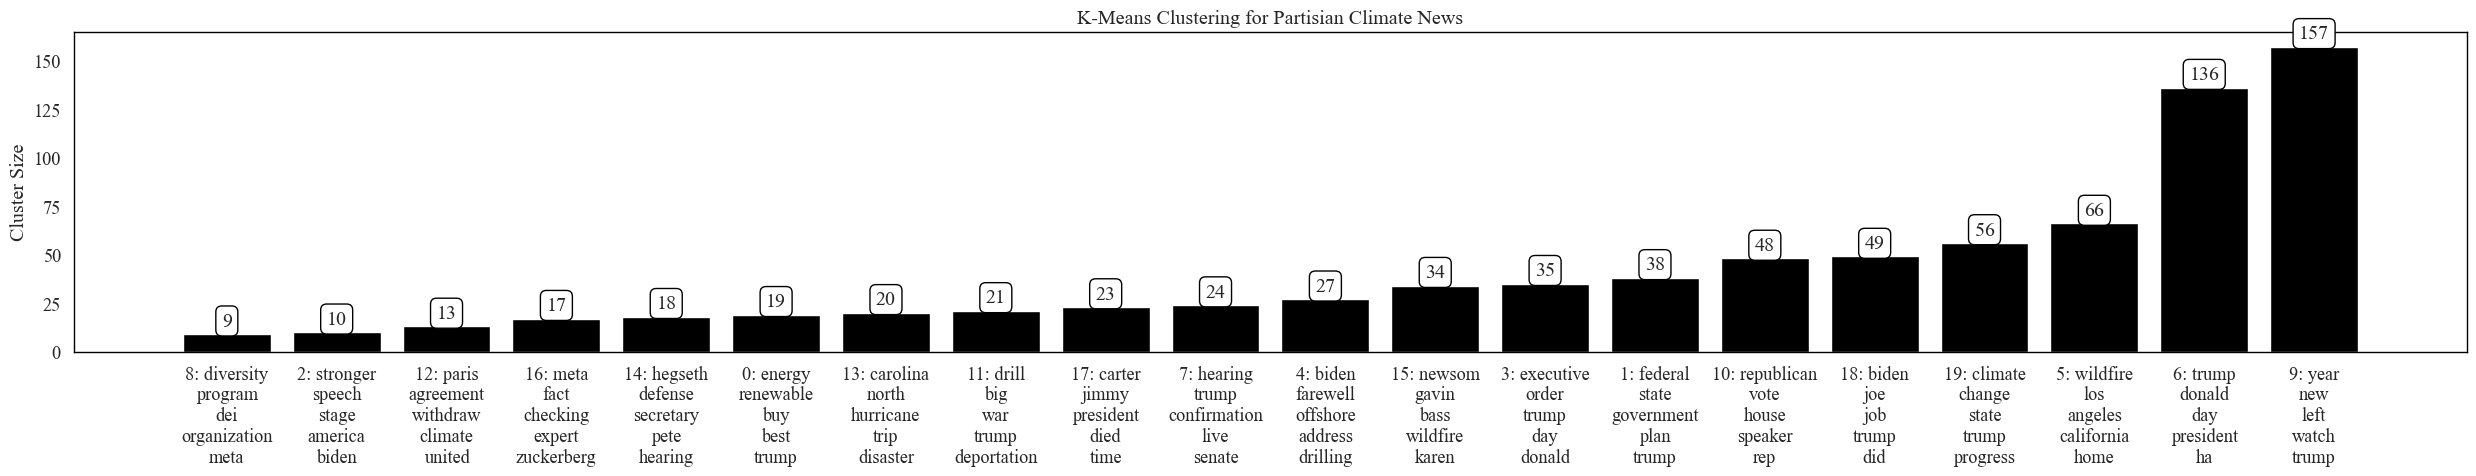

In [83]:
barplot_maker(cluster_news_data,figsize_x=25,x_axis_value='Top Words',y_axis_value='Cluster Size',plot_title='K-Means Clustering for Partisian Climate News',x_axis_title='',y_axis_title='Cluster Size',fig_filename='kmeans Climate News')

#### Bills Data

In [30]:
bills_terms = bills_data.columns.to_list()

🧺🐜... clustering: 100%|██████████████████████████████████████████████████████████████| 10/10 [13:36<00:00, 81.61s/it]


Silhouette Clustering Testing:
Clmiate Bills TFIDF Lemmatized
	Iterations: 50
	Cluster Range: 2 - 50
	Step Size: 5
-------------------------------------------------------------------------------


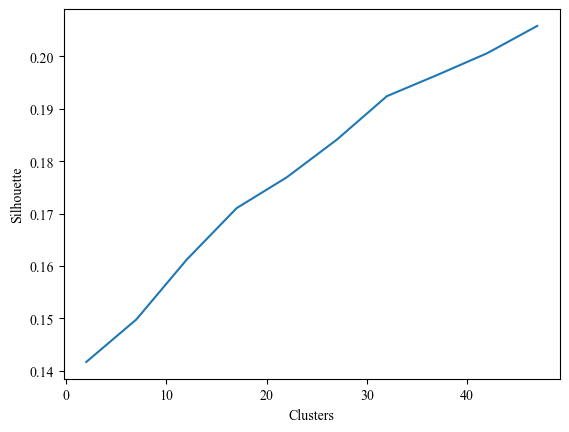

-------------------------------------------------------------------------------
   Clusters  Silhouette
0         2    0.141690
1         7    0.149808
2        12    0.161176
3        17    0.171037
4        22    0.176919
5        27    0.184108
6        32    0.192412
7        37    0.196432
8        42    0.200604
9        47    0.205814


In [31]:
bills_shadow_scores = shadow_tester("Climate Bills TFIDF Lemmatized",bills_data,random_state=811,num_iterations =50,
                                   step_size=5,cluster_start=2,cluster_end=50)

🧺🐜... clustering: 100%|███████████████████████████████████████████████████████████████| 5/5 [12:51<00:00, 154.21s/it]


Silhouette Clustering Testing:
Climate Bills TFIDF Lemmatized
	Iterations: 50
	Cluster Range: 50 - 100
	Step Size: 10
-------------------------------------------------------------------------------


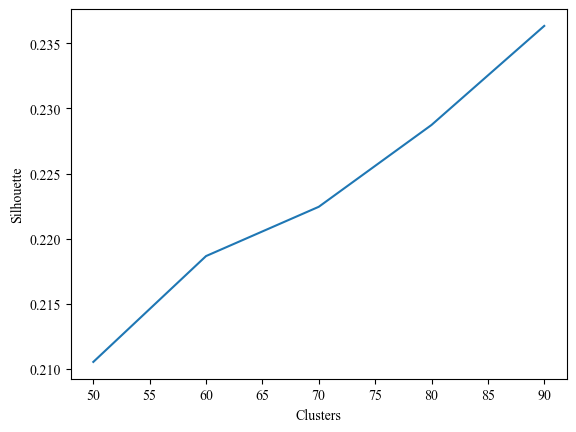

-------------------------------------------------------------------------------
   Clusters  Silhouette
0        50    0.210547
1        60    0.218672
2        70    0.222454
3        80    0.228734
4        90    0.236336


In [32]:
bills_shadow_scores = shadow_tester("Climate Bills TFIDF Lemmatized",bills_data,random_state=811,num_iterations =50,
                                   step_size=10,cluster_start=50,cluster_end=100)

🧺🐜... clustering: 100%|████████████████████████████████████████████████████████████████| 6/6 [06:41<00:00, 66.99s/it]


Silhouette Clustering Testing:
Climate Bills TFIDF Lemmatized
	Iterations: 10
	Cluster Range: 100 - 250
	Step Size: 25
-------------------------------------------------------------------------------


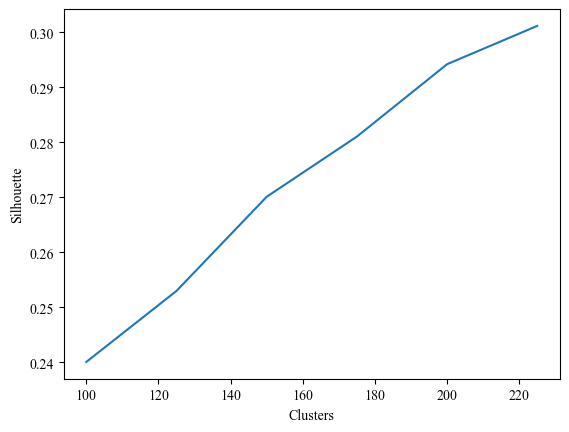

-------------------------------------------------------------------------------
   Clusters  Silhouette
0       100    0.240085
1       125    0.252986
2       150    0.270088
3       175    0.281021
4       200    0.294171
5       225    0.301127


In [33]:
bills_shadow_scores = shadow_tester("Climate Bills TFIDF Lemmatized",bills_data,random_state=811,num_iterations =10,
                                   step_size=25,cluster_start=100,cluster_end=250)

In [35]:
bills_kmean = fit_and_evaluate(bills_data,random_state=811,num_clusters=100,num_iterations=100,dataset_name = 'Climate Bills Lemmed- Count Vectorizer - Unlabeled')
cluster_topn = cluster_reader(bills_kmean,bills_data,bills_terms,num_clusters=100,k_words=5,dataset_name = 'Climate Bills Lemmed- Count Vectorizer - Unlabeled')

------------------------------------------------------------------
K-MEANS CLUSTERING FOR: Climate Bills Lemmed- Count Vectorizer - Unlabeled
Model Paramaters:
	k = 100
	n_init = 100 

Sihloutte Score: 0.2400854680843723

Number of elements assigned to each cluster: [425  88  33  22   6  23 358  15  38  41  13  20  29  12  53  16  20  23
  29  33  35  49  88  11  25   7  11  17  18  29  37  18  55  29   7  30
  66   8  13  24  19   7  14  51  19  29  51  15  14  63  26  56  16  20
  37  12  35   8   7  31  11   7  16  19   7  16  13  39  23   6  27  24
  12  11  24  16  45  22   9  52  31  27  88  18  22  23  49  15  14  11
  15  18  16  19   7  12  14  34  13  12]

The Cluster IDs are:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

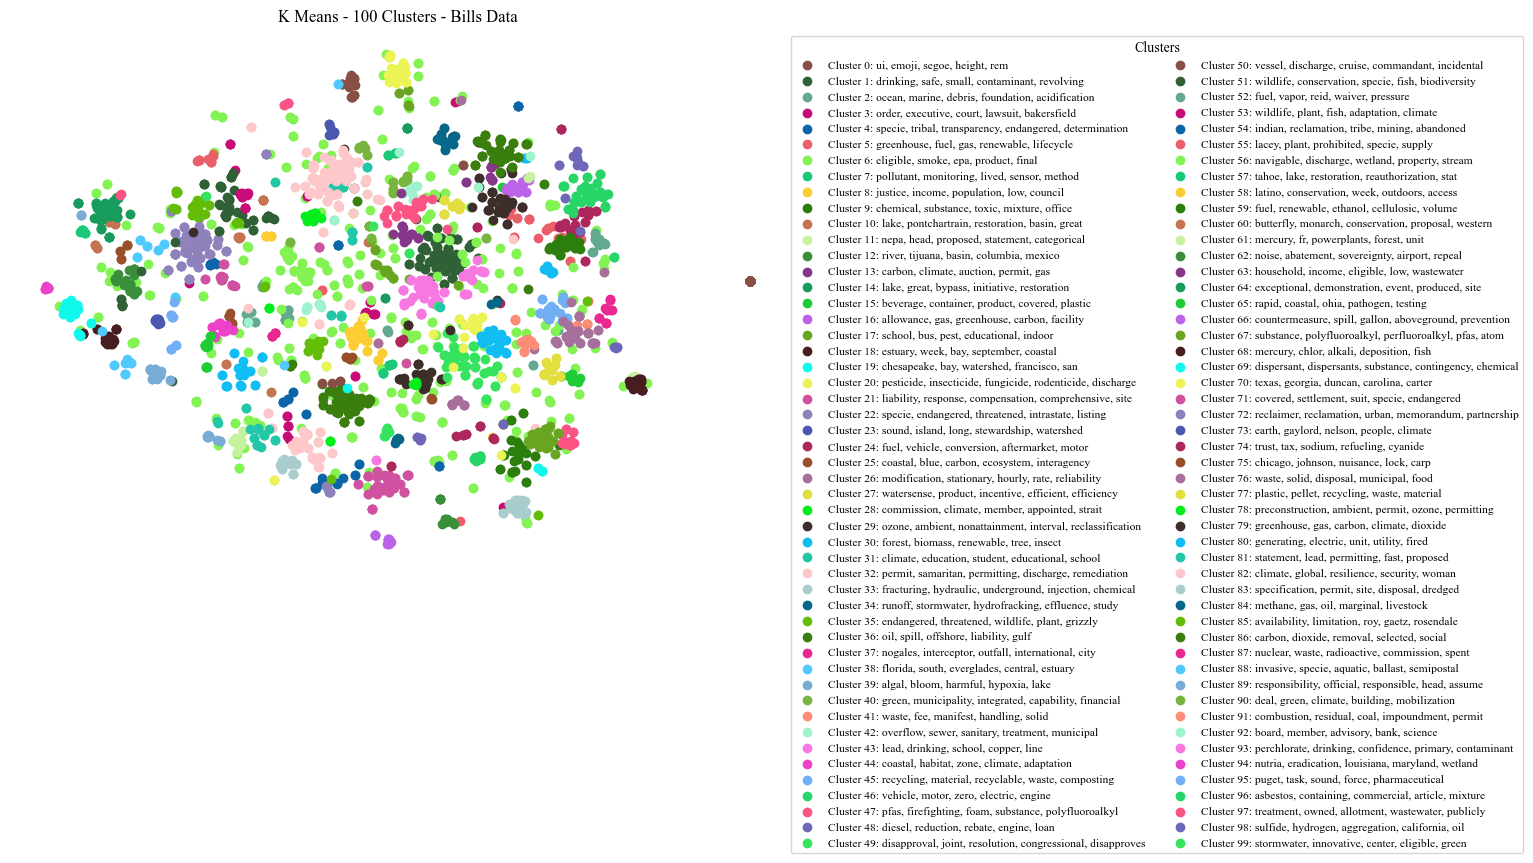

In [59]:
cluster_vis("K Means - 100 Clusters - Bills Data",bills_kmean,bills_data,bills_terms)

In [77]:
bills_kmean = fit_and_evaluate(bills_data,random_state=811,num_clusters=20,num_iterations=100,dataset_name = 'Climate Bills Lemmed- Count Vectorizer - Unlabeled')
cluster_topn = cluster_reader(bills_kmean,bills_data,bills_terms,num_clusters=20,k_words=5,dataset_name = 'Climate Bills Lemmed- Count Vectorizer - Unlabeled')

------------------------------------------------------------------
K-MEANS CLUSTERING FOR: Climate Bills Lemmed- Count Vectorizer - Unlabeled
Model Paramaters:
	k = 20
	n_init = 100 

Sihloutte Score: 0.17459738911996303

Number of elements assigned to each cluster: [122 425 170 139  79 140 907 130 152 132  59  92  29  84  83  77  62  61
  46 272]

The Cluster IDs are:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
------------------------------------------------------------------
TOP WORDS PER CLUSTER FOR: Climate Bills Lemmed- Count Vectorizer - Unlabeled
Cluster 0: carbon greenhouse gas dioxide allowance 

Cluster 1: ui emoji segoe height rem 

Cluster 2: climate adaptation global coastal resilience 

Cluster 3: drinking lead safe contaminant eligible 

Cluster 4: lake great restoration tahoe basin 

Cluster 5: specie endangered threatened wildlife conservation 

Cluster 6: proposed final wildlife covered nepa 

Cluster 7: estuary bay chesapeake river restoration 

Clu

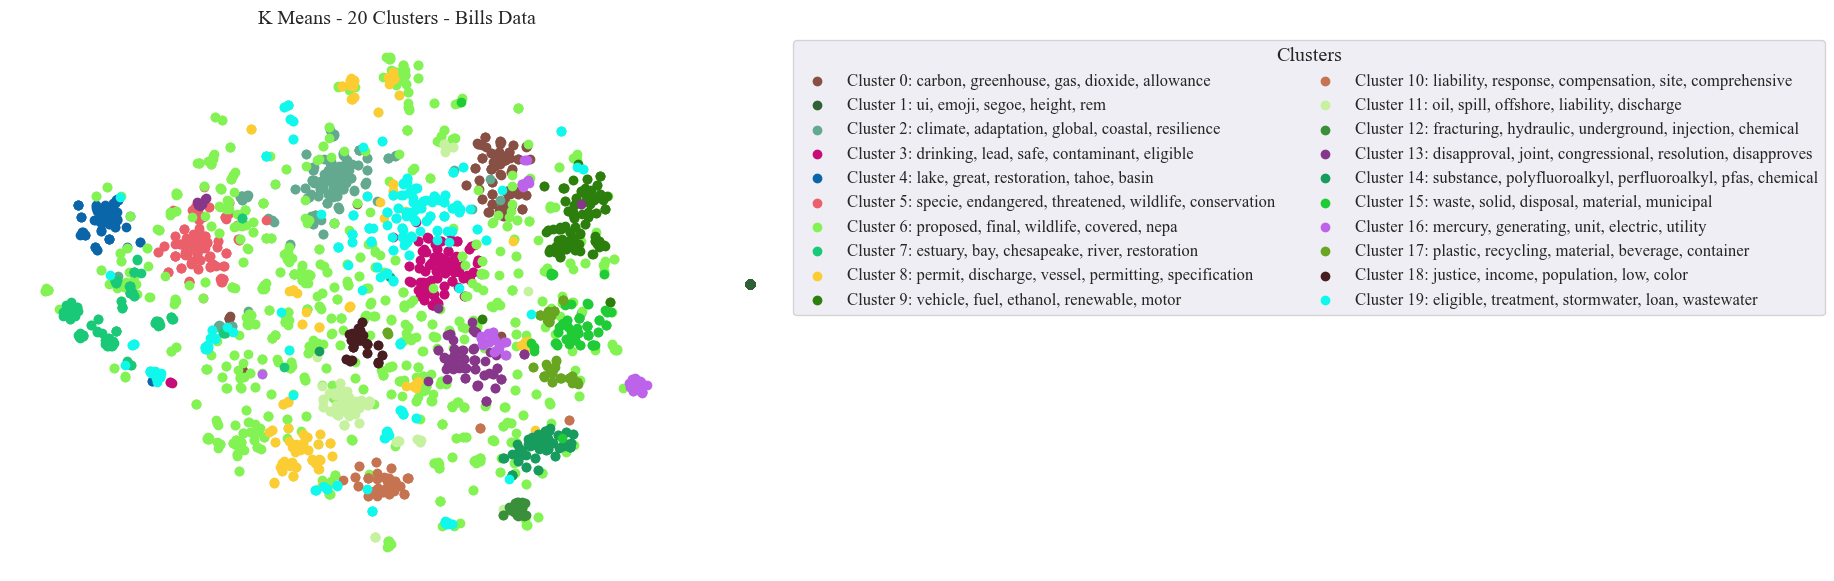

In [78]:
cluster_vis("K Means - 20 Clusters - Bills Data",bills_kmean,bills_data,bills_terms)

In [79]:
cluster_climate_data = data_formatter(x_data=[122, 425, 170, 139,  79, 140, 907, 130, 152, 132,  59,  92,  29,  84,  83,  77,  62,  61,46, 272], 
                                      y_data=[
    '0: carbon\ngreenhouse\ngas\ndioxide\nallowance',
    '1: ui\nemoji\nsegoe\nheight\nrem',
    '2: climate\nadaptation\nglobal\ncoastal\nresilience',
    '3: drinking\nlead\nsafe\ncontaminant\neligible',
    '4: lake\ngreat\nrestoration\ntahoe\nbasin',
    '5: specie\nendangered\nthreatened\nwildlife\nconservation',
    '6: proposed\nfinal\nwildlife\ncovered\nnepa',
    '7: estuary\nbay\nchesapeake\nriver\nrestoration',
    '8: permit\ndischarge\nvessel\npermitting\nspecification',
    '9: vehicle\nfuel\nethanol\nrenewable\nmotor',
    '10: liability\nresponse\ncompensation\nsite\ncomprehensive',
    '11: oil\nspill\noffshore\nliability\ndischarge',
    '12: fracturing\nhydraulic\nunderground\ninjection\nchemical',
    '13: disapproval\njoint\ncongressional\nresolution\ndisapproves',
    '14: substance\npolyfluoroalkyl\nperfluoroalkyl\npfas\nchemical',
    '15: waste\nsolid\ndisposal\nmaterial\nmunicipal',
    '16: mercury\ngenerating\nunit\nelectric\nutility',
    '17: plastic\nrecycling\nmaterial\nbeverage\ncontainer',
    '18: justice\nincome\npopulation\nlow\ncolor',
    '19: eligible\ntreatment\nstormwater\nloan\nwastewater'
] ,x_colname='Cluster Size',y_colname='Top Words')

cluster_climate_data.sort_values(by='Cluster Size',inplace=True)

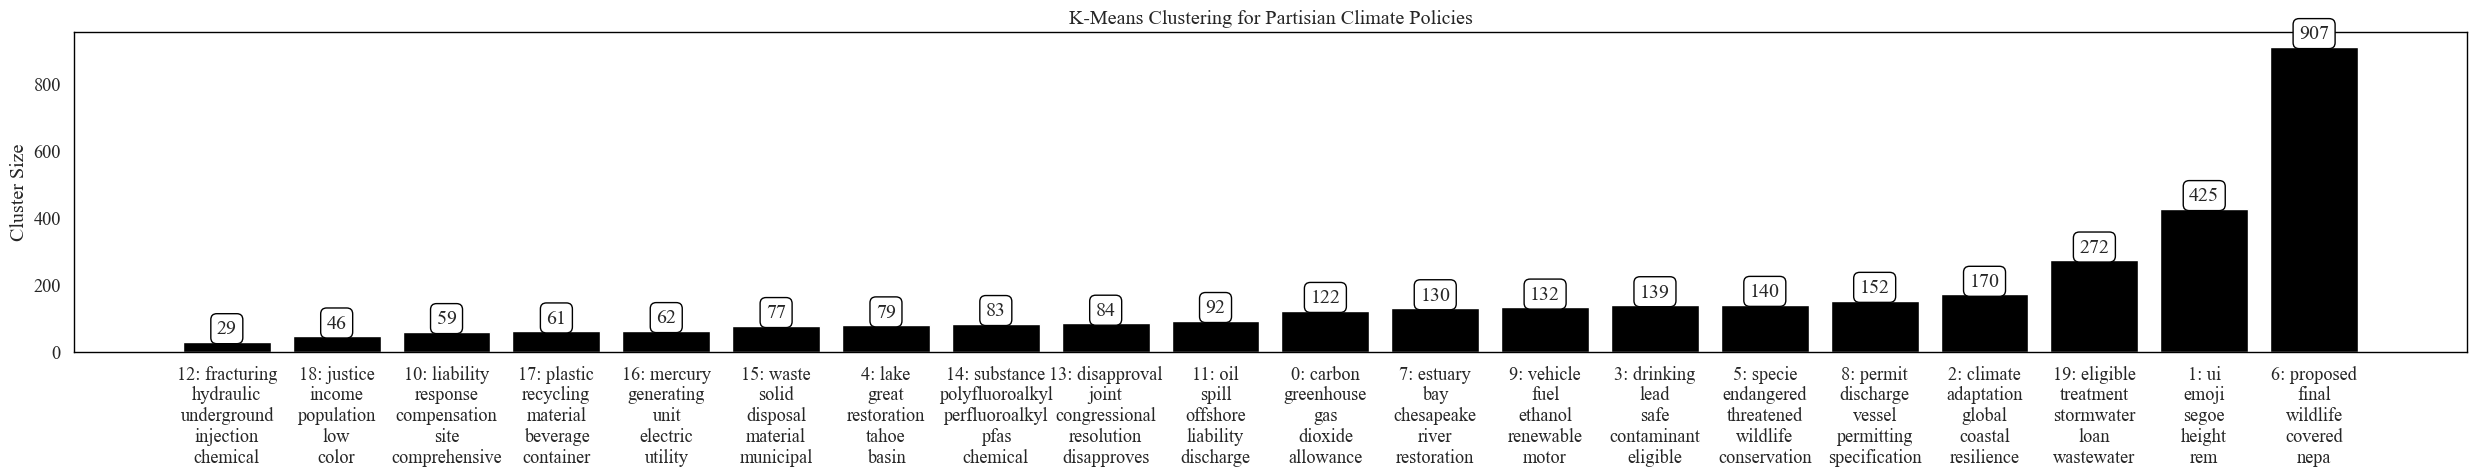

In [82]:
barplot_maker(cluster_climate_data,figsize_x=25,x_axis_value='Top Words',y_axis_value='Cluster Size',plot_title='K-Means Clustering for Partisian Climate Policies',x_axis_title='',y_axis_title='Cluster Size',fig_filename='kmeans Climate Cluster Distribution')

#### Party Platform Clustering

Because the party platform only has two rows, it cannot be clustered!

In [40]:
party_terms = party_data.columns.to_list()

In [41]:
party_shadow_scores = shadow_tester("Party Platform TFIDF Lemmatized",party_data,random_state=811,num_iterations =10,
                                   step_size=5,cluster_start=2,cluster_end=50)

🧺🐜... clustering:   0%|                                                                       | 0/10 [00:00<?, ?it/s]C:\Users\natal\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
🧺🐜... clustering:   0%|                                                                       | 0/10 [00:00<?, ?it/s]


ValueError: Number of labels is 2. Valid values are 2 to n_samples - 1 (inclusive)

## 3. Preforming PCA

### 3.1 Importing The Necessary Libraries for PCA

In [1]:
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### 3.2 Scaling The Data

In [33]:
scaler = StandardScaler() ##Instantiate
pca_scaled_news=scaler.fit_transform(news_data) ## Scale data
pca_scaled_bills=scaler.fit_transform(bills_data) ## Scale data
pca_scaled_party_platform=scaler.fit_transform(party_data) ## Scale data

### 3.3 Testing Best PCA Values

In [76]:
def pca_tester(scaled_data, raw_data, components,title):
    ''' PCA FITTING '''
    ## Fitting the PCA Model to the number of components desired
    pca_model = PCA(n_components=components)
    result = pca_model.fit_transform(scaled_data)

    ## Extracting the Values to Identify Variance
    eigenvalues = pca_model.explained_variance_
    explained_variance_ratio = pca_model.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    ## Creating and Index for the Numbers of Principle Components Generated
    component_indices = np.arange(1, components + 1)

    ## Fitting them to a dataframe to plot
    data = {
        'Component': component_indices,
        'Eigen Values': list(eigenvalues),
        'Explained Variance Ratio': list(explained_variance_ratio),
        'Cumulative Variance': list(cumulative_variance)
    }

    plotting_data = pd.DataFrame.from_dict(data)

    ## Identfiying the largest Eigen Value drop
    eigenvalue_diffs = np.diff(eigenvalues) 
    max_drop_index = np.argmax(np.abs(eigenvalue_diffs))  
    max_drop_component = component_indices[max_drop_index]  

    ''' PLOTTING '''
    fig = make_subplots(rows=1, cols=2, subplot_titles=["Eigenvalues", "Variance"])

    ## Plotting EigenValues on the left hand side
    fig.add_trace(
        go.Scatter(x=plotting_data["Component"], y=plotting_data["Eigen Values"], mode="lines+markers", name="Eigenvalues"),
        row=1, col=1
    )

    ## Highlight the largest drop
    fig.add_trace(
        go.Scatter(
            x=[max_drop_component, max_drop_component + 1],
            y=[eigenvalues[max_drop_index], eigenvalues[max_drop_index + 1]],
            mode="markers+lines",
            marker=dict(color='red', size=10),
            name="Largest Drop"
        ),
        row=1, col=1
    )

    ## Plotting Variance on the right hand side
    fig.add_trace(
        go.Scatter(x=plotting_data["Component"], y=plotting_data["Explained Variance Ratio"], mode="lines+markers", name="Explained Variance Ratio"),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Scatter(x=plotting_data["Component"], y=plotting_data["Cumulative Variance"], mode="lines+markers", name="Cumulative Variance"),
        row=1, col=2
    )

    ## Situating Plotting Labels
    fig.update_layout(title_text=title, showlegend=True, xaxis_title="Principal Component", yaxis_title="Values")

    fig.show()


In [79]:
pca_tester(pca_scaled_news,news_data,200,'PCA Component Testing for News Data')

Max eigenvalue drop occurs between Component 1 and Component 2, with a difference of -4.1235


In [80]:
pca_tester(pca_scaled_bills,bills_data,200,'PCA Component Testing for Bill Data')

Max eigenvalue drop occurs between Component 2 and Component 3, with a difference of -18.7251


In [85]:
pca_tester(pca_scaled_party_platform,party_data,2,'PCA Component Testing for Party Platform Data')

Max eigenvalue drop occurs between Component 1 and Component 2, with a difference of -1784.0000


### 3.4 Fitting and Exploring the Best PCA Models

For the above, a PCA value of 2 was selected for the party platform, as that is the total number of instances within it, then 50 components and 20 components were selected for the Bill Information and News Data.

In [315]:
def pca_modeler(scaled_data,raw_data,data_type, components,vis_indicies,label_list,label_names):
    ''' PCA FITTING '''
    
    words = raw_data.columns.to_list()
    ## Fitting the PCA Model to the number of components desired
    pca_model = PCA(n_components=components)
    result = pca_model.fit_transform(scaled_data)

    ## Extracting the Values to Identify Variance
    eigenvalues = pca_model.explained_variance_
    eigenvectors = pca_model.components_
    explained_variance_ratio = pca_model.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    ## Creating and Index for the Numbers of Principle Components Generated
    component_indices = np.arange(1, components + 1)

    ## Fitting them to a dataframe to plot
    data = {
        'Component': component_indices,
        'Eigen Values': list(eigenvalues),
        'Explained Variance Ratio': list(explained_variance_ratio),
        'Cumulative Variance': list(cumulative_variance)
    }

    plotting_data = pd.DataFrame.from_dict(data)
    
    ''' VISUALIZING MEANINGFUL WORDS '''

    components = pca_model.components_

    pcs = []
    component_labels = []
    for component in range(0,len(components)):
        pcs.append(components[component])
        
        label = "Principle Component "
        num = str(component)
        current_label = label+num+": "
        
        component_labels.append(current_label)
    

    iteration = 0
    for curr_pc in pcs:
        print ("\n----------------------------------")
        print (component_labels[iteration])
        # Get sorted indices (descending by absolute value)
        important_indices = np.argsort(np.abs(curr_pc))[::-1]

        # Show top N important words for PC1
        top_n = 3
        for i in range(top_n):
            word_index = important_indices[i]
            word = words[word_index]
            weight = curr_pc[word_index]
            print(f"{word}: {weight:.4f}")

        iteration = iteration + 1
        
        
    ''' GENERATING A BIPLOT '''
    pc1 = input("First PC to Visualize ")
    pc2 = input("Second PC to Visualize ")
    pc3 = input("Third PC to Visualize ")
    
    PCA_dataset= result 
    col_eigenvectors = eigenvectors.T
    
    # Get the absolute weights for each feature
    pc1_weights = np.abs(col_eigenvectors[:, int(pc1)])  # Weights for PC1
    pc2_weights = np.abs(col_eigenvectors[:, int(pc2)])  # Weights for PC2
    pc3_weights = np.abs(col_eigenvectors[:, int(pc3)])  # Weights for PC2
    
    
    # Combine the two components' weights (as you care about both PC1 and PC2)
    feature_importance = pc1_weights + pc2_weights
    
    # Get the indices of the top 10 most important features based on the combined weight
    top_indices = np.argsort(feature_importance)[-(vis_indicies):][::-1]
    
    # Select the corresponding labels (top 10 features)
    top_words = [words[i] for i in top_indices]

    # Select the corresponding eigenvectors (top 10 features)
    top_eigenvectors = col_eigenvectors[top_indices]
    


    for label in range(0,len(label_list)):
        ## Generating labels
        label_name = label_names[label]
        current_labels = label_list[label]
        numeric_labels, word_labels = label_mapper(current_labels)
        cmap = plt.get_cmap("plasma", lut=len(set(numeric_labels)))
       
        # Ensure top_indices doesn't exceed available rows
        top_indices = [i for i in top_indices if i < len(numeric_labels)]
        top_numeric_labels = numeric_labels.iloc[top_indices].tolist()
        top_word_labels = word_labels.iloc[top_indices].tolist()
        
        ## Plotting
        biplot_title = f"Biplot of Principle Components for {len(components)} Components:\n{data_type} Data\n{label_name} Labels "
        plt.figure(figsize=(7, 7))
        biplot(cmap,int(pc1),int(pc2),result,top_eigenvectors,col_eigenvectors,words,numeric_labels,word_labels,top_words,biplot_title,vis_indicies)
        plt.show()
        
        triplot_title = f"3D Plot of Principle Components for {len(components)} Components:\n{data_type} Data\n{label_name} Labels "
        plt.figure(figsize=(10,10))
        threed_plotter(result,int(pc1),int(pc2),int(pc3),numeric_labels,triplot_title)
        plt.show()

In [344]:
def biplot(cmap,pc1,pc2,pca_model_result, top_eigenvectors, eigenvector_columns, words, numeric_labels, word_labels, top_words, title,vis_indicies):
    xs = pca_model_result[:, pc1]
    ys = pca_model_result[:, pc2]
    n = eigenvector_columns.shape[0]
   
    scalex = .4 / (xs.max() - xs.min())
    scaley = .4 / (ys.max() - ys.min())
    
    
    plt.scatter(xs * scalex, ys * scaley, cmap=cmap, edgecolor='k', s=300, c=numeric_labels)
    
    for i in range(0,vis_indicies):
        x_offset = np.random.uniform(-0.2, 0.2)  # Random horizontal offset
        y_offset = np.random.uniform(-0.2, 0.2)  # Random vertical offset
        plt.arrow(0, 0, eigenvector_columns[i, 0]*5, eigenvector_columns[i, 1]*5, color='b', alpha=0.5)
        
              # Use word_labels instead of numeric labels for text annotations
        plt.text(eigenvector_columns[i, 0] * 1.07 + x_offset, eigenvector_columns[i, 1] * 1.07 + y_offset+0.01, 
                 top_words[i], color='black', ha='center', va='center', fontsize=10)

    plt.xlabel(str(pc1))
    plt.ylabel(str(pc2))
    plt.axis('off')  # This will remove both the axis lines and the ticks

    plt.title(title)


In [238]:
def label_mapper(words):
    # Create a dictionary to map words to label indices
    label_dict = {word: idx for idx, word in enumerate(words)}
    
    # Create a reverse dictionary to map indices back to words
    reverse_dict = {idx: word for word, idx in label_dict.items()}

    # Map the words to their corresponding numerical indices
    numeric_labels = pd.Series(words).map(label_dict)
    
    # Map the numerical indices back to words for display
    word_labels = numeric_labels.map(reverse_dict)
    
    return numeric_labels, word_labels

In [239]:
def threed_plotter(pca_result,pc1,pc2,pc3,numeric_labels,title):


    fig2 = plt.figure()
        #figsize=(12, 12))
    ax2 = fig2.add_subplot(projection='3d')

    x=pca_result[:,pc1]
    y=pca_result[:,pc2] 
    z=pca_result[:,pc3]
    #print(y)

    ax2.scatter(x,y,z, cmap="plasma", edgecolor='k', s=200, c=numeric_labels)
    #surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title(title)
    #


----------------------------------
Principle Component 0: 
wtf: 0.2421
toilet: 0.2421
jasmine: 0.2421

----------------------------------
Principle Component 1: 
cuff: 0.2662
neig: 0.2662
celeb: 0.2662

----------------------------------
Principle Component 2: 
fu: 0.2486
gamble: 0.2486
profit: 0.2486

----------------------------------
Principle Component 3: 
ranked: 0.2753
zers: 0.2753
pet: 0.2753

----------------------------------
Principle Component 4: 
profligate: 0.2578
brother: 0.2578
rational: 0.2578

----------------------------------
Principle Component 5: 
salting: 0.1995
entire: 0.1995
desire: 0.1995

----------------------------------
Principle Component 6: 
coast: 0.1610
entire: 0.1610
salting: 0.1610

----------------------------------
Principle Component 7: 
risked: 0.1568
floodgate: 0.1568
opening: 0.1568

----------------------------------
Principle Component 8: 
korea: 0.2550
crash: 0.2550
apologizes: 0.2550

----------------------------------
Principle Component 9

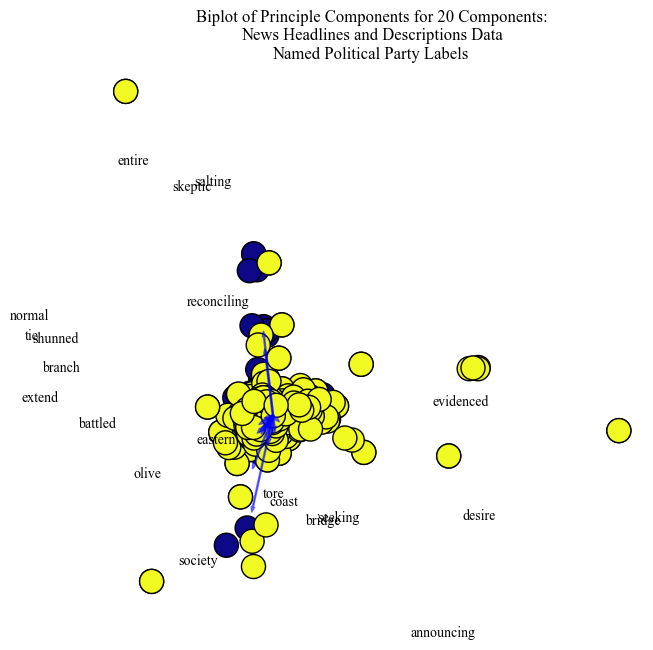

<Figure size 1000x1000 with 0 Axes>

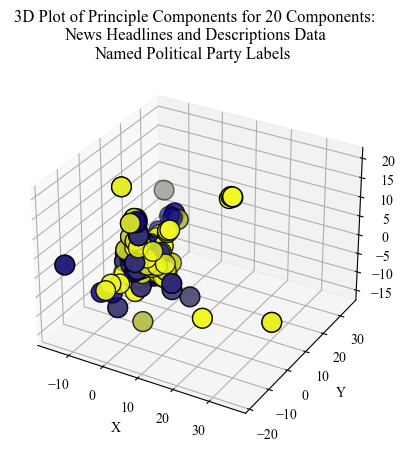

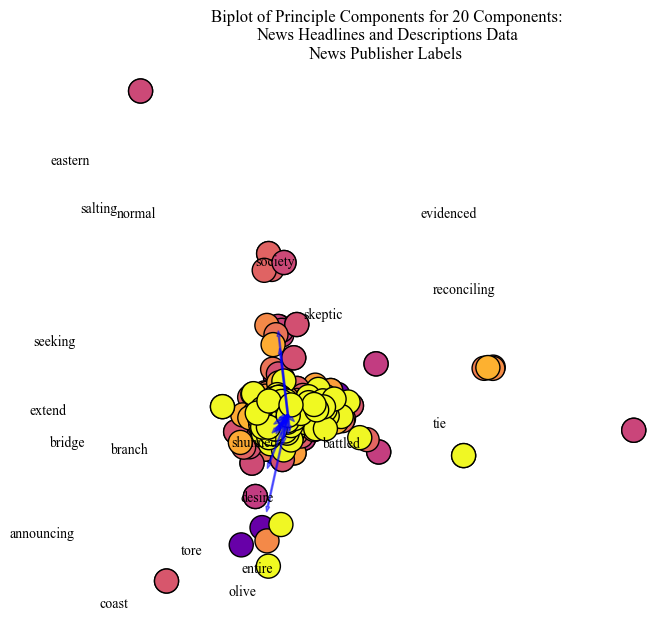

<Figure size 1000x1000 with 0 Axes>

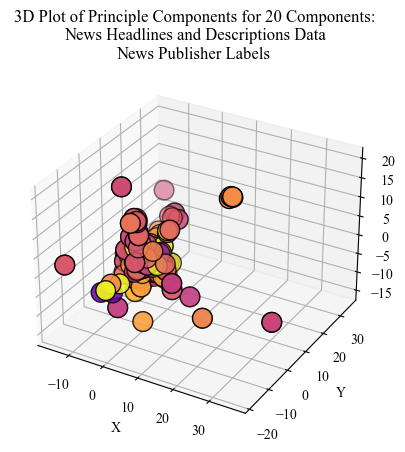

In [346]:
pca_modeler(pca_scaled_news,news_data,"News Headlines and Descriptions",20,20,[labels_news_party,labels_news_publisher],['Named Political Party','News Publisher'])


----------------------------------
Principle Component 0: 
hgtv: 0.2421
mace: 0.2421
shiplap: 0.2421

----------------------------------
Principle Component 1: 
spotted: 0.2670
unwelcome: 0.2670
celeb: 0.2670

----------------------------------
Principle Component 2: 
gamble: 0.2515
entourage: 0.2515
profit: 0.2515

----------------------------------
Principle Component 3: 
veterinarian: 0.2776
zers: 0.2776
ranked: 0.2776

----------------------------------
Principle Component 4: 
comwe: 0.2570
brother: 0.2570
rawpixel: 0.2570

----------------------------------
Principle Component 5: 
coast: 0.1916
eastern: 0.1916
bridge: 0.1916

----------------------------------
Principle Component 6: 
eastern: 0.1719
evidenced: 0.1719
salting: 0.1719

----------------------------------
Principle Component 7: 
triggered: 0.1460
floodgate: 0.1460
risked: 0.1460

----------------------------------
Principle Component 8: 
korea: 0.2310
dy: 0.2310
visa: 0.2310

----------------------------------
Princi

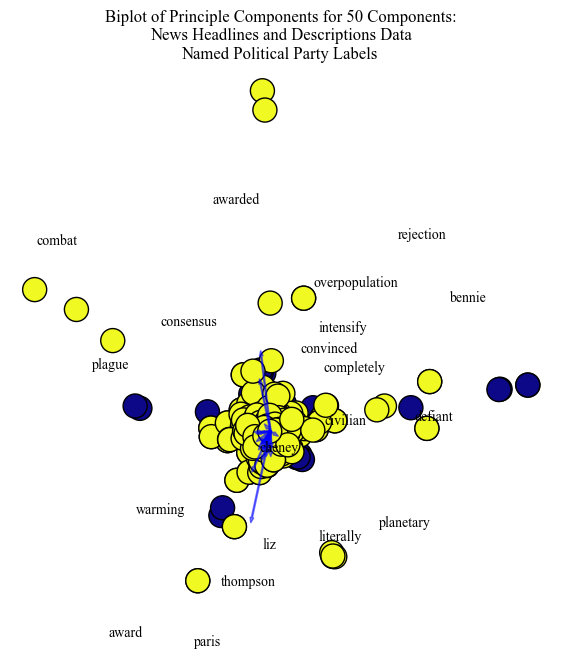

<Figure size 1000x1000 with 0 Axes>

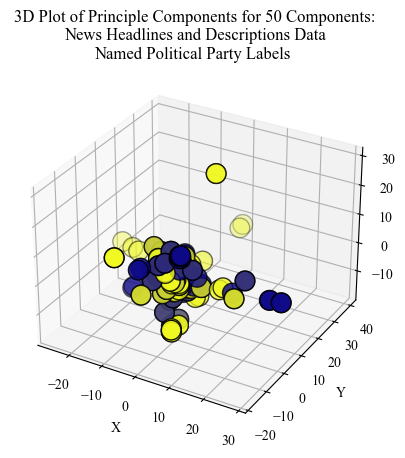

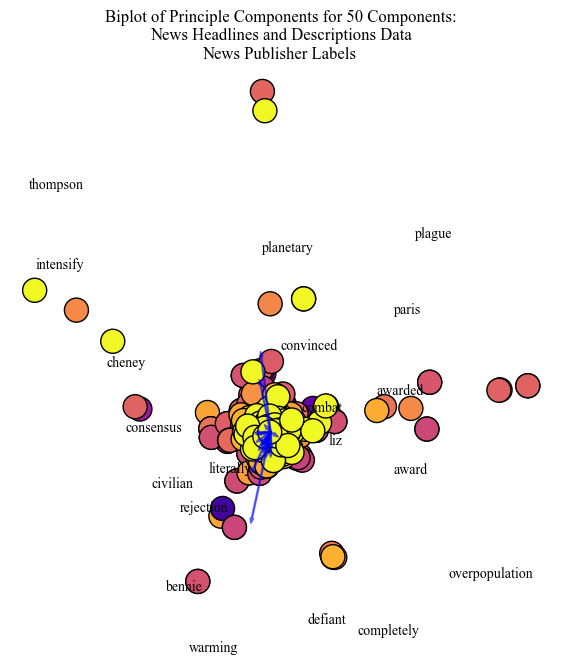

<Figure size 1000x1000 with 0 Axes>

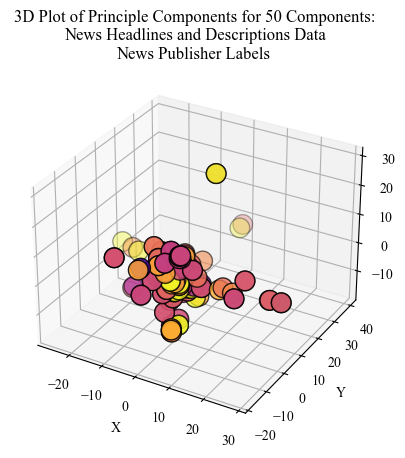

In [347]:
pca_modeler(pca_scaled_news,news_data,"News Headlines and Descriptions",50,20,[labels_news_party,labels_news_publisher],['Named Political Party','News Publisher'])


----------------------------------
Principle Component 0: 
recommissioning: 0.0845
rehearing: 0.0843
undistributed: 0.0841

----------------------------------
Principle Component 1: 
nonplastic: 0.0866
polypropylene: 0.0833
pause: 0.0826

----------------------------------
Principle Component 2: 
symbol: 0.0610
box: 0.0603
font: 0.0602

----------------------------------
Principle Component 3: 
menstrual: 0.0761
intimate: 0.0761
scented: 0.0761

----------------------------------
Principle Component 4: 
color: 0.0803
family: 0.0785
just: 0.0784

----------------------------------
Principle Component 5: 
family: 0.0638
just: 0.0617
size: 0.0610

----------------------------------
Principle Component 6: 
bisphenol: 0.0843
xylenol: 0.0842
aldehyde: 0.0842

----------------------------------
Principle Component 7: 
organize: 0.0465
mobilization: 0.0457
langevin: -0.0454

----------------------------------
Principle Component 8: 
bargain: 0.0825
amounting: 0.0818
preindustrialized: 0.0818


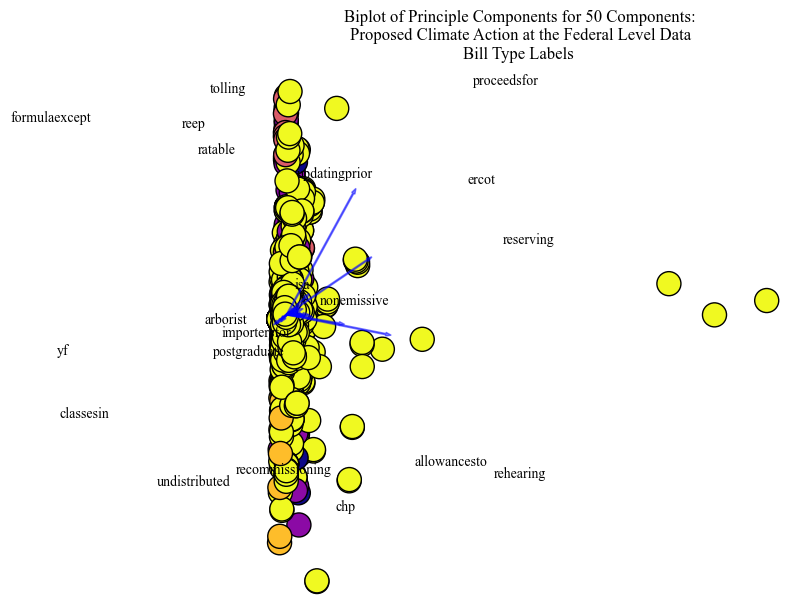

<Figure size 1000x1000 with 0 Axes>

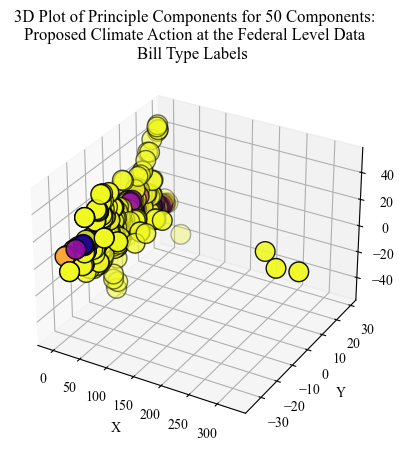

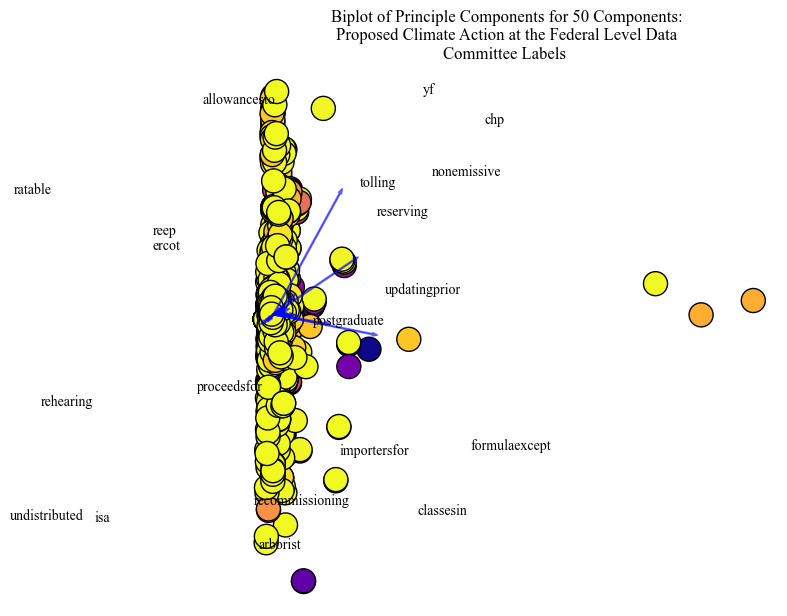

<Figure size 1000x1000 with 0 Axes>

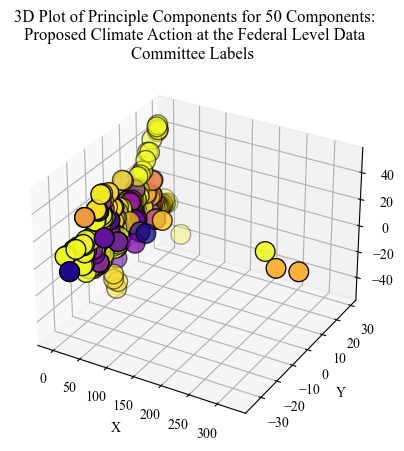

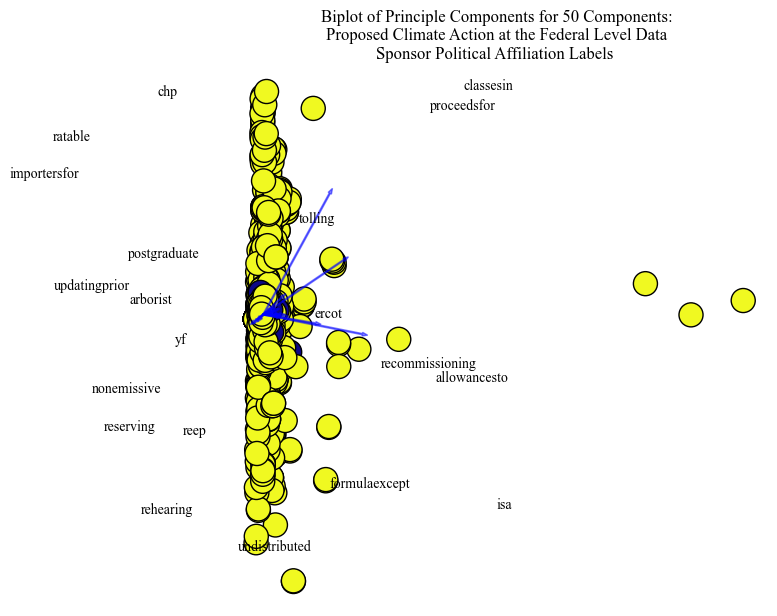

<Figure size 1000x1000 with 0 Axes>

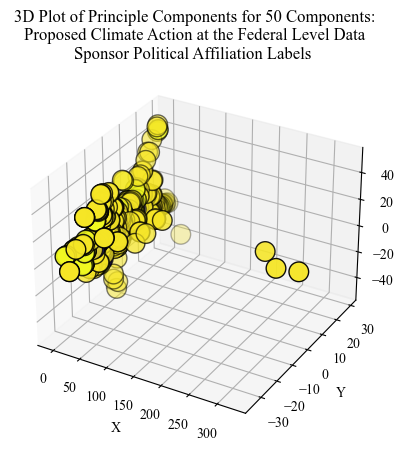

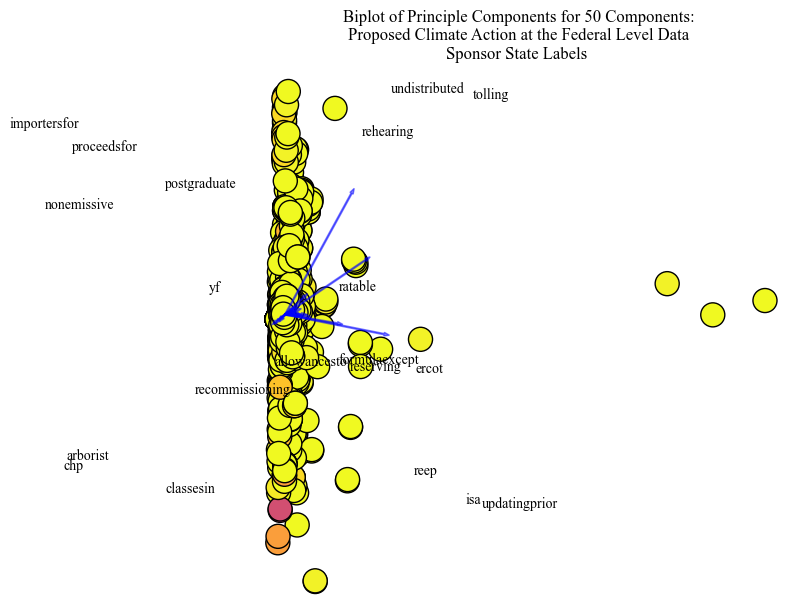

<Figure size 1000x1000 with 0 Axes>

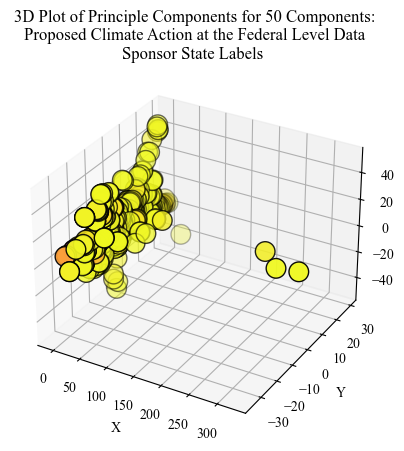

In [351]:
pca_modeler(pca_scaled_bills,bills_data,"Proposed Climate Action at the Federal Level",50,20,[labels_bills_billtype, labels_bills_committees,labels_bills_sponser_affiliation,labels_bills_sponser_state],['Bill Type','Committee','Sponsor Political Affiliation', 'Sponsor State'])


----------------------------------
Principle Component 0: 
recommissioning: 0.0845
rehearing: 0.0843
undistributed: 0.0841

----------------------------------
Principle Component 1: 
nonplastic: 0.0866
polypropylene: 0.0833
pause: 0.0826

----------------------------------
Principle Component 2: 
symbol: 0.0610
box: 0.0603
font: 0.0602

----------------------------------
Principle Component 3: 
scented: 0.0760
intimate: 0.0760
menstrual: 0.0760

----------------------------------
Principle Component 4: 
color: 0.0803
family: 0.0784
just: 0.0783

----------------------------------
Principle Component 5: 
family: 0.0643
just: 0.0622
size: 0.0616

----------------------------------
Principle Component 6: 
bisphenol: 0.0839
aldehyde: 0.0838
xylenol: 0.0838

----------------------------------
Principle Component 7: 
mobilization: 0.0531
organize: 0.0495
divide: 0.0487

----------------------------------
Principle Component 8: 
bargain: 0.0792
amounting: 0.0787
preindustrialized: 0.0786

--

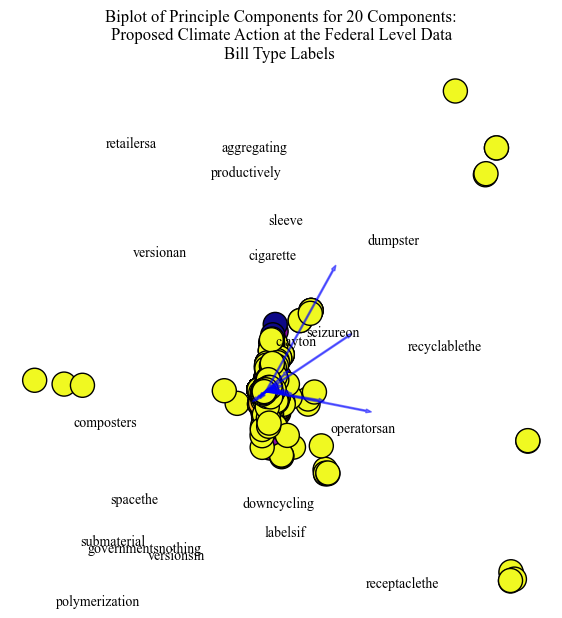

<Figure size 1000x1000 with 0 Axes>

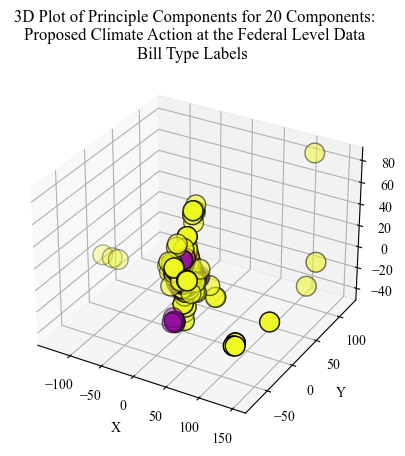

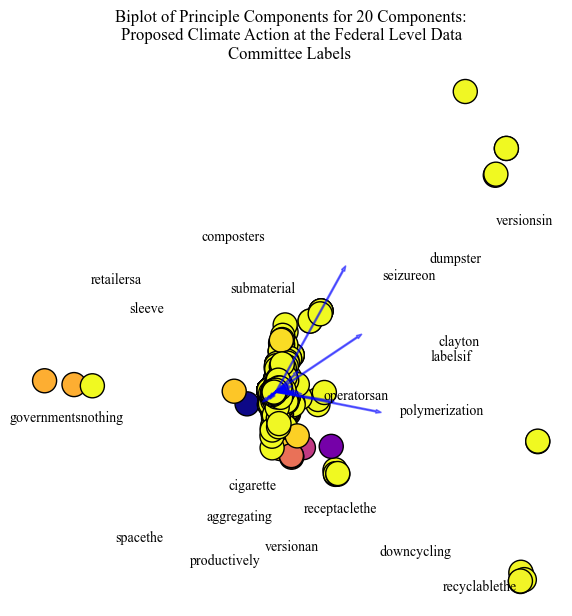

<Figure size 1000x1000 with 0 Axes>

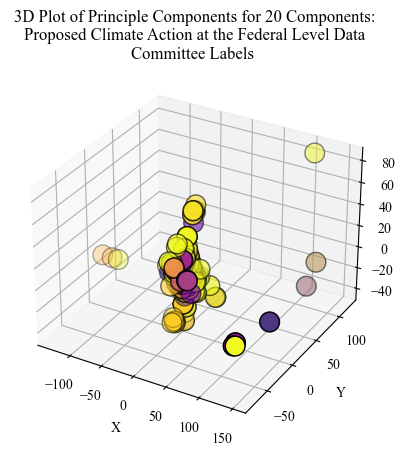

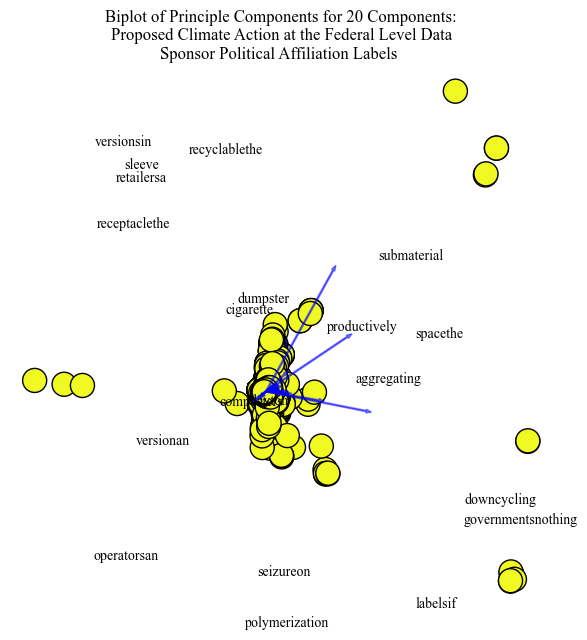

<Figure size 1000x1000 with 0 Axes>

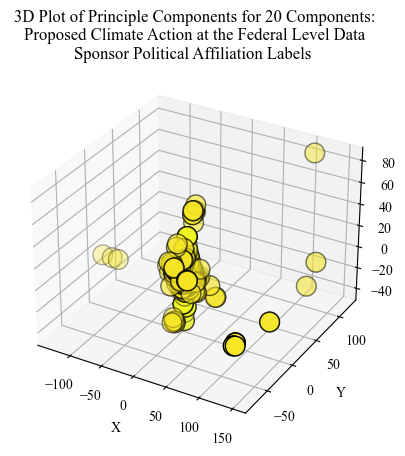

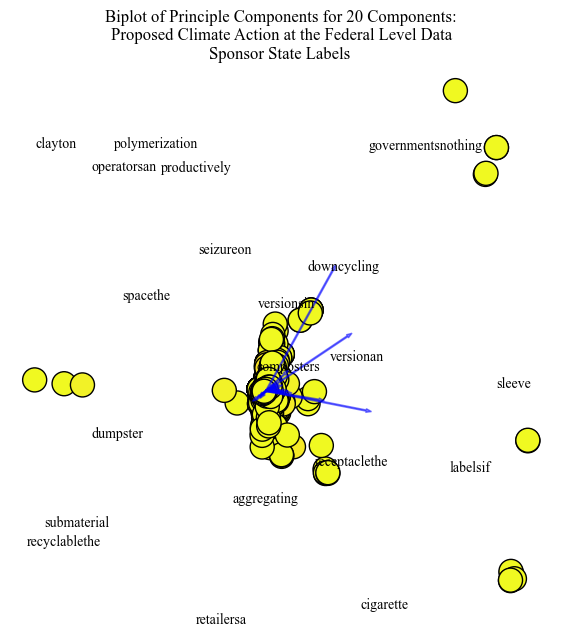

<Figure size 1000x1000 with 0 Axes>

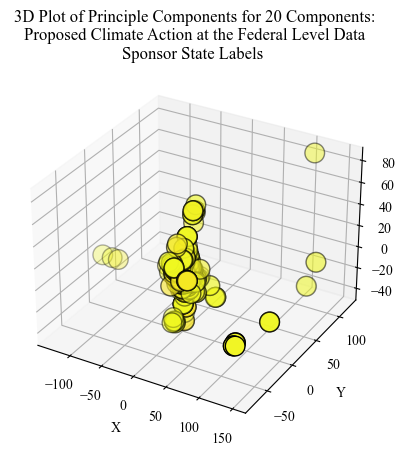

In [348]:
pca_modeler(pca_scaled_bills,bills_data,"Proposed Climate Action at the Federal Level",20,20,[labels_bills_billtype, labels_bills_committees,labels_bills_sponser_affiliation,labels_bills_sponser_state],['Bill Type','Committee','Sponsor Political Affiliation', 'Sponsor State'])


----------------------------------
Principle Component 0: 
recommissioning: 0.0845
rehearing: 0.0843
undistributed: 0.0841

----------------------------------
Principle Component 1: 
nonplastic: 0.0866
polypropylene: 0.0833
pause: 0.0826

----------------------------------
Principle Component 2: 
symbol: 0.0610
box: 0.0603
font: 0.0602

----------------------------------
Principle Component 3: 
scented: 0.0763
intimate: 0.0763
menstrual: 0.0763

----------------------------------
Principle Component 4: 
color: 0.0799
family: 0.0782
just: 0.0781

----------------------------------
Principle Component 5: 
family: 0.0647
just: 0.0625
size: 0.0618

----------------------------------
Principle Component 6: 
bisphenol: 0.0816
aldehyde: 0.0815
xylenol: 0.0815

----------------------------------
Principle Component 7: 
bargain: 0.0869
preindustrialized: 0.0862
amounting: 0.0862

----------------------------------
Principle Component 8: 
xylenol: 0.0489
aldehyde: 0.0489
bisphenol: 0.0488

----

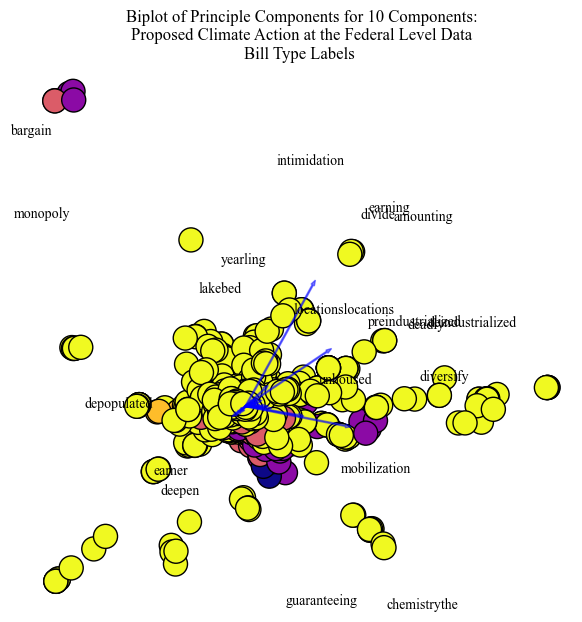

<Figure size 1000x1000 with 0 Axes>

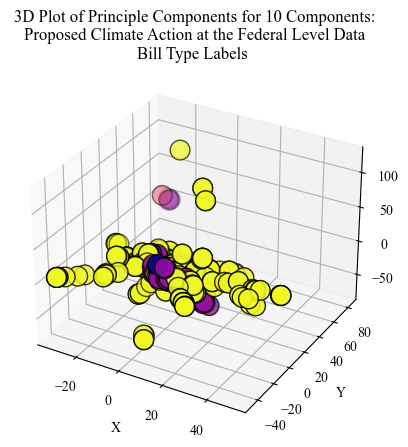

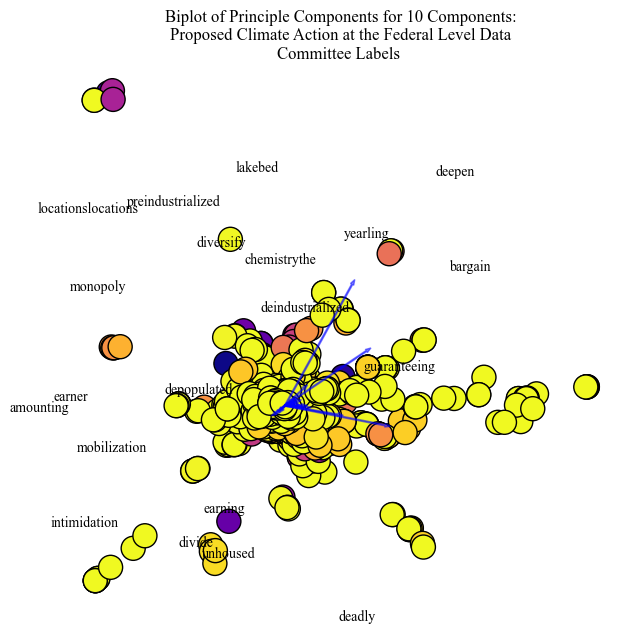

<Figure size 1000x1000 with 0 Axes>

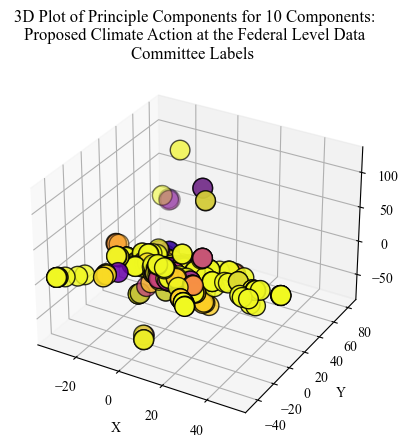

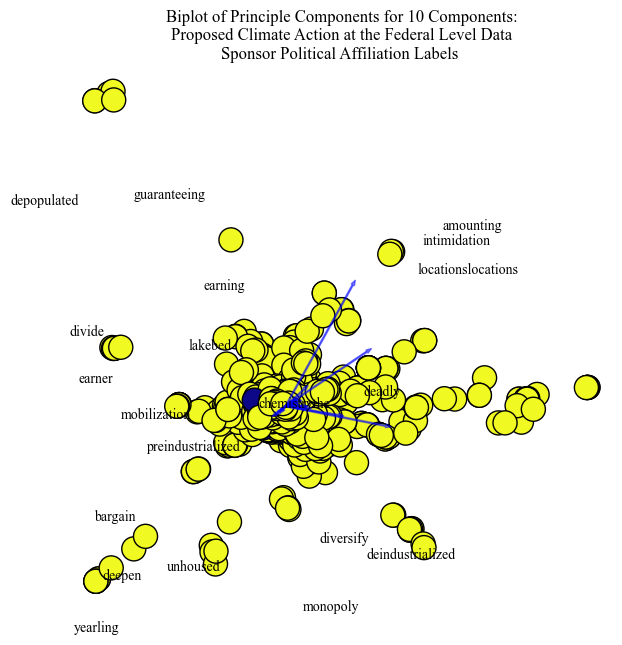

<Figure size 1000x1000 with 0 Axes>

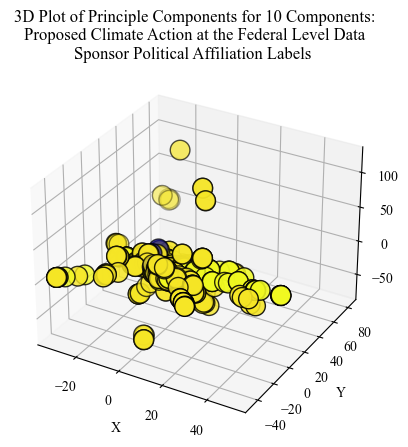

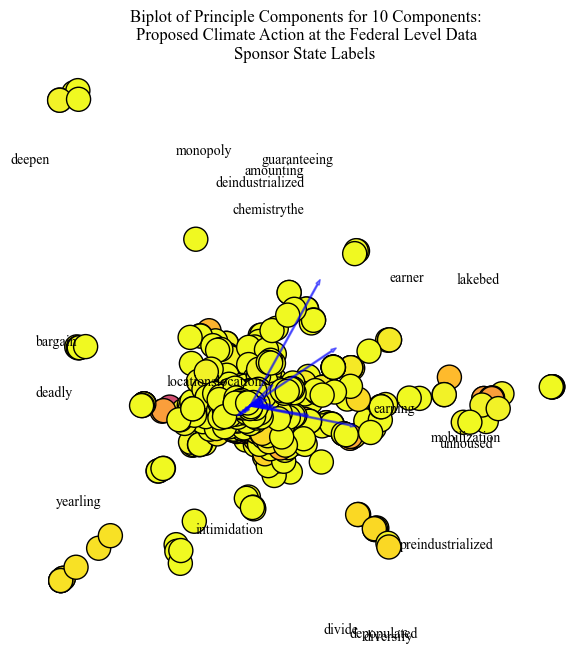

<Figure size 1000x1000 with 0 Axes>

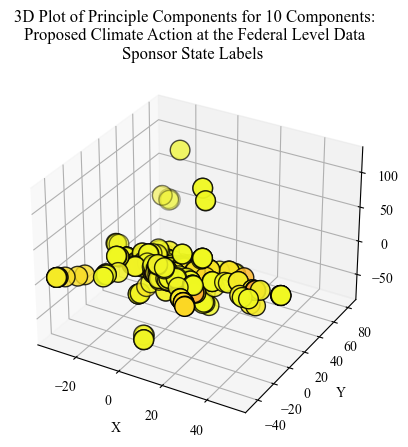

In [350]:
pca_modeler(pca_scaled_bills,bills_data,"Proposed Climate Action at the Federal Level",10,20,[labels_bills_billtype, labels_bills_committees,labels_bills_sponser_affiliation,labels_bills_sponser_state],['Bill Type','Committee','Sponsor Political Affiliation', 'Sponsor State'])


----------------------------------
Principle Component 0: 
ability: 0.0335
industry: -0.0335
essential: -0.0335

----------------------------------
Principle Component 1: 
ability: 0.9417
burdensome: 0.0542
chaos: 0.0542
First PC to Visualize0
Second PC to Visualize1


KeyError: 2

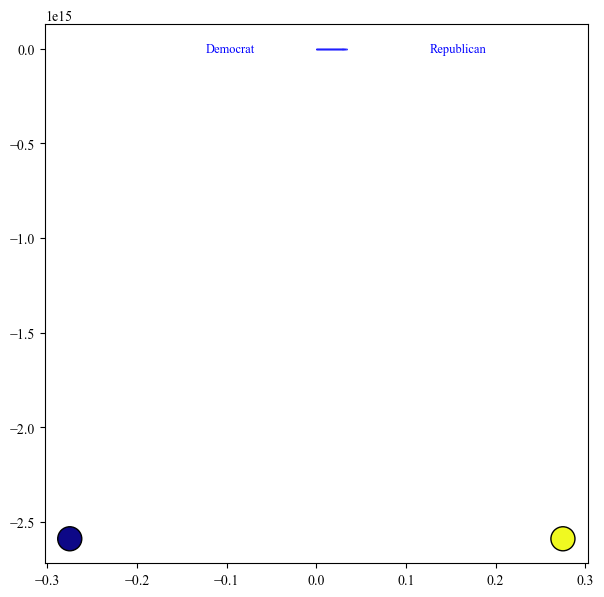

In [220]:
pca_modeler(pca_scaled_party_platform,party_data,"2024 Party Platforms",2,20,[labels_party_party],['Partisian Affiliation'])